# Exploratory Data Analysis - Abalone Dataset

## Context

This notebook presents an exploratory data analysis of the **Abalone dataset**, which contains physical measurements of abalone (marine snails).

**Objective**: Understand the relationship between physical characteristics and age to prepare for predictive modeling.

**Target variable**: `Rings` (number of rings) - a proxy for age (Age = Rings + 1.5 years)

## Analysis Plan

1. Data quality check
2. Descriptive statistics
3. Distribution analysis of key variables
4. Correlation analysis
5. Relationship between features and age
6. Key findings


## 1. Setup and Data Loading


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot configuration
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# Load the dataset
df = pd.read_csv("abalone.csv")

print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst few rows:")
df.head()

Dataset shape: 4177 rows, 9 columns

First few rows:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2. Data Quality Check


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

print("\nData types:")
print(df.dtypes)

Missing values per column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Number of duplicate rows: 0

Data types:
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


## 3. Descriptive Statistics


In [6]:
# Summary statistics
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Interpretation:**

The 'Rings' variable represents the number of growth rings in the abalone shell, which is directly related to age. The mean of approximately 9-10 rings suggests most abalones in the dataset are relatively young to middle-aged. Physical measurements (length, diameter, various weights) show reasonable variation, with no immediately obvious data quality issues. The standard deviations indicate meaningful variability in abalone sizes.


In [7]:
# Create Age variable (traditional method for estimating abalone age)
df["Age"] = df["Rings"] + 1.5

## 4. Distribution Analysis

### 4.1 Target Variable: Age


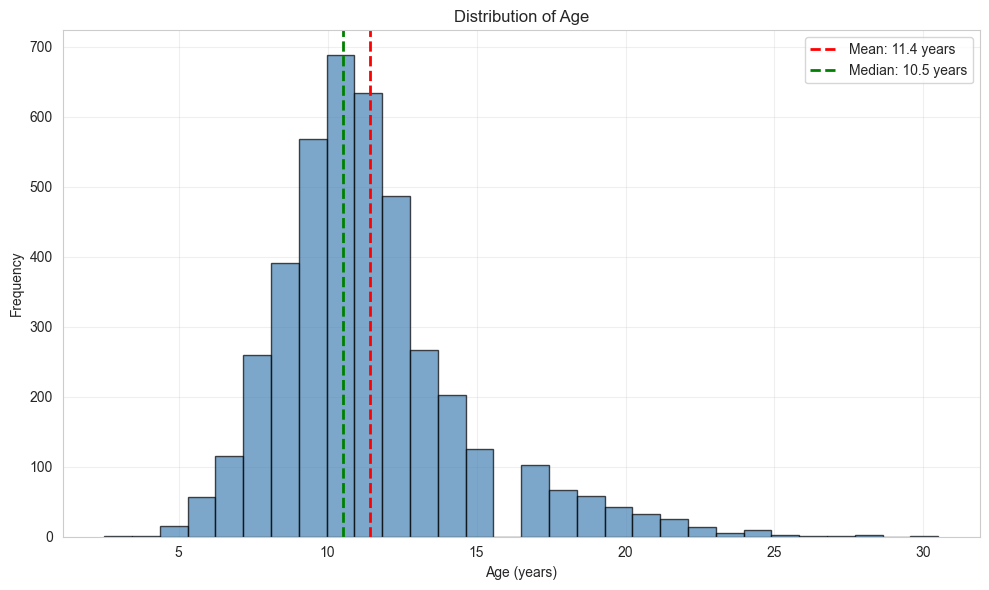

In [8]:
plt.figure(figsize=(10, 6))

# Age distribution
plt.hist(df["Age"], bins=30, edgecolor="black", alpha=0.7, color="steelblue")
plt.axvline(df["Age"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {df['Age'].mean():.1f} years")
plt.axvline(df["Age"].median(), color="green", linestyle="--", linewidth=2, label=f"Median: {df['Age'].median():.1f} years")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation:**

The age distribution shows a right-skewed pattern, indicating that younger abalones are more common in the dataset. The peak occurs around 10.5-11.5 years old, with fewer older specimens.

### 4.2 Key Physical Measurements

We focus on the most important physical features likely to predict age:


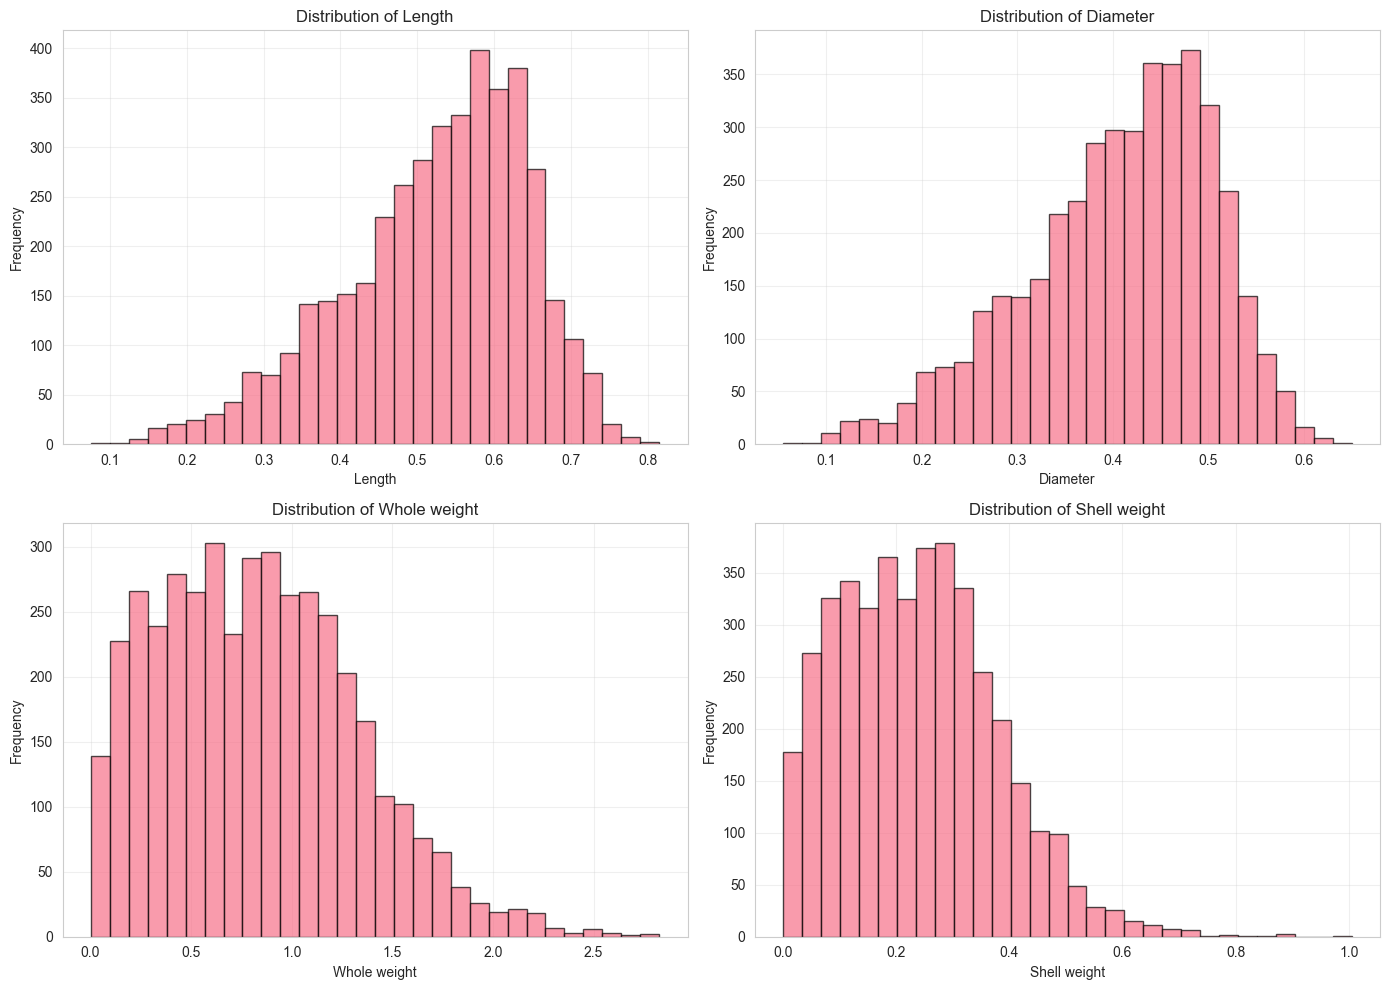

In [9]:
# Select key features most likely to be important for age prediction
key_features = ["Length", "Diameter", "Whole weight", "Shell weight"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature], bins=30, edgecolor="black", alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Distribution of {feature}")
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation:**

All physical measurements show right-skewed distributions similar to the age variable, which makes sense biologically - smaller, younger abalones are more numerous. Length and Diameter follow similar patterns, as expected since they measure similar dimensions. The weight variables (Whole weight and Shell weight) also show the expected right skew, with most abalones being lighter (younger) and fewer heavy (older) specimens.


## 5. Correlation Analysis


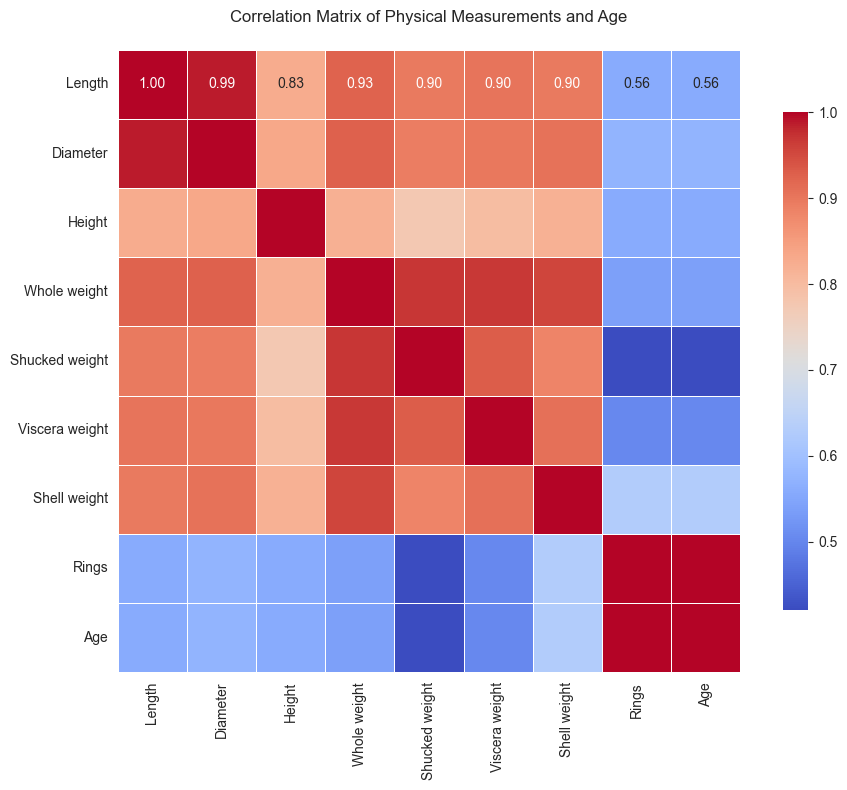

In [10]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))

# Select numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Physical Measurements and Age", pad=20)
plt.tight_layout()
plt.show()

**Interpretation:**

The correlation analysis reveals several important insights:

1. **Shell weight shows the highest correlation with Age** (around 0.63), making it potentially the most predictive single feature. This makes biological sense as shell thickness increases with age.

2. **Strong multicollinearity exists among size measurements**: Length, Diameter, and Height are very highly correlated (>0.9), which is expected as they all measure abalone size.

3. **All weight measurements are highly correlated with each other** (>0.9), indicating redundancy. Shell weight might be sufficient to represent weight-based features.


## 6. Relationship Between Features and Age

Let's examine how physical measurements relate to age through scatter plots:


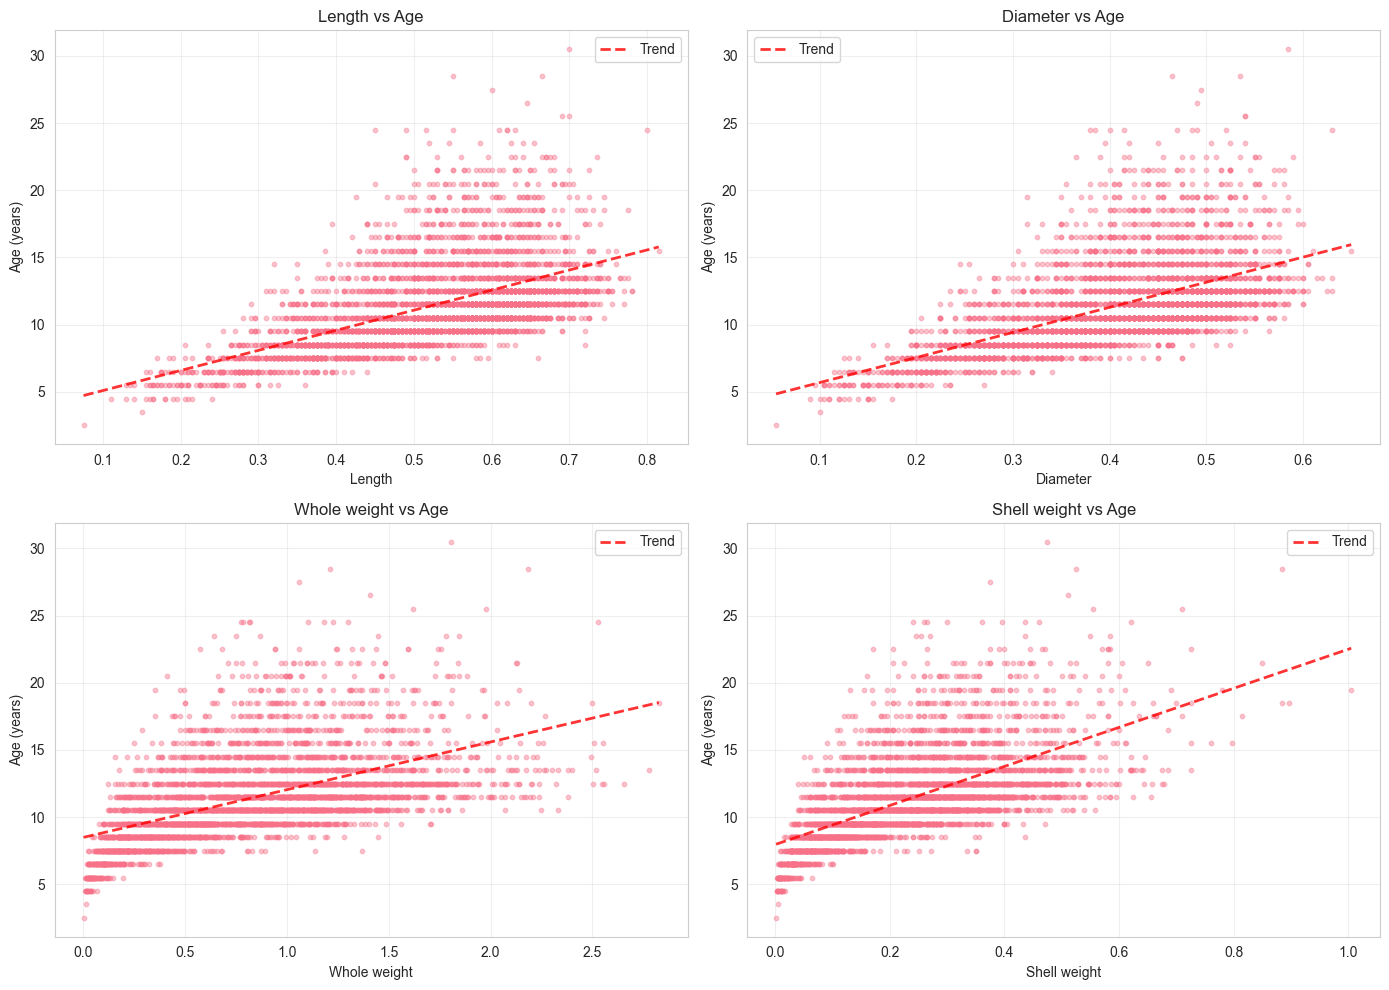

In [11]:
# Scatter plots for key features vs Age
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].scatter(df[feature], df["Age"], alpha=0.4, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Age (years)")
    axes[idx].set_title(f"{feature} vs Age")
    axes[idx].grid(alpha=0.3)

    # Add trend line
    z = np.polyfit(df[feature], df["Age"], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[idx].plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.8, label="Trend")
    axes[idx].legend()

plt.tight_layout()
plt.show()

**Interpretation:**

The scatter plots reveal important patterns:

1. **Positive but weak linear relationships**: All features show positive trends with age, but with considerable scatter. This confirms the moderate correlations we saw earlier.
4. **Shell weight appears most consistent**: Among the features, Shell weight shows the tightest relationship with age, supporting its higher correlation value.


### Sex Distribution and Impact


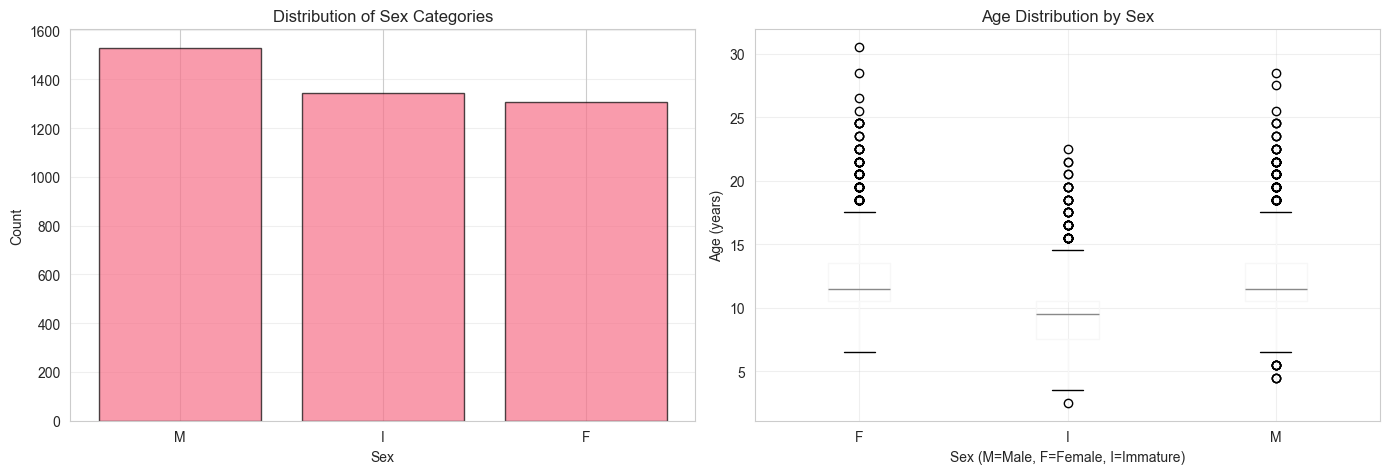

In [12]:
# Sex distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sex_counts = df["Sex"].value_counts()
axes[0].bar(sex_counts.index, sex_counts.values, alpha=0.7, edgecolor="black")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Sex Categories")
axes[0].grid(alpha=0.3, axis="y")

# Box plot: Age by Sex
df.boxplot(column="Age", by="Sex", ax=axes[1])
axes[1].set_xlabel("Sex (M=Male, F=Female, I=Immature)")
axes[1].set_ylabel("Age (years)")
axes[1].set_title("Age Distribution by Sex")
plt.suptitle("")  # Remove default title
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation:**

The Sex variable shows a balanced distribution across the three categories (Male, Female, Immature), which is good for modeling. As expected, Immature abalones (I) show a lower mean age compared to Males (M) and Females (F), which have similar age distributions.

## 7. Key Findings

1. **Data Quality**: The dataset is clean with no missing values or duplicates, containing 4,177 samples with 9 features.

2. **Target Variable**: Age shows a right-skewed distribution, with most abalones being young (around 10-11 years). 

3. **Feature Relationships**: 
   - Shell weight has the strongest correlation with age (around 0.63)
   - Strong multicollinearity exists among physical measurements
   - Relationships with age are positive but only moderately strong

4. **Sex Variable**: Provides useful information, with immature abalones being systematically younger than males and females.
